In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Plot demography

In [4]:
N0 = 188088

In [2]:
with open("discoal_CEU.txt", "r") as dem:
    arg_ls = dem.readline().strip().split()

In [5]:
times = np.array(arg_ls[1::4], dtype=float)*4*N0
sizes = np.array(arg_ls[3::4], dtype=float)*N0

In [12]:
dem = np.vstack(([0, N0], np.vstack((times.astype(int), sizes.astype(int))).T))

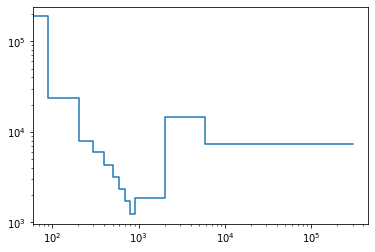

In [17]:
plt.step(dem[:, 0], dem[:, 1], where="post")
plt.xscale("log")
plt.yscale("log")

In [18]:
dem

array([[     0, 188088],
       [    90,  23382],
       [   204,   8006],
       [   300,   5930],
       [   400,   4360],
       [   500,   3205],
       [   599,   2357],
       [   699,   1733],
       [   799,   1236],
       [   920,   1860],
       [   999,   1860],
       [  1200,   1860],
       [  1500,   1863],
       [  2041,  14473],
       [  2800,  14473],
       [  3700,  14473],
       [  4699,  14462],
       [  5921,   7310],
       [  6400,   7310],
       [  6999,   7310],
       [  7799,   7310],
       [  8999,   7310],
       [ 11000,   7310],
       [ 13999,   7310],
       [ 18000,   7310],
       [ 24999,   7310],
       [ 35000,   7310],
       [ 49999,   7310],
       [100000,   7310],
       [300000,   7310]])

#### Read output

In [2]:
import sys
sys.path.append("../../DA-SIA/fea_encoding")
from utils import *

In [3]:
from Bio import Phylo
from io import StringIO

In [4]:
discoal_path = "/grid/siepel/home_norepl/mo/dom_adapt/1000GCEU_reanalysis/discoal_temp/discoal_CEU198swp_1128_198_swp_237_1182.discoal"

In [5]:
soft_flag = False
SAF = 0
cat = 'swp'
c_low, c_high = [0.1, 0.9]
with open(discoal_path, "r") as discoalF:
    read_GT = False
    seek_onset = False # seek sweep onset
    onset_gen = -1
    for line in discoalF:
        if line[:8] == "segsites":
            segsites = int(line.strip().split()[1])
            gtm = np.empty((0, segsites), dtype=np.int8)
            continue
        if line[:9] == "positions":
            var_pos = np.array(line.strip().split()[1:], dtype=float)
            read_GT = True
            continue
        if line[:4] == "Freq":
            seek_onset = True
            continue
        if seek_onset:
            gbp_der_anc = line.strip().split()
            if len(gbp_der_anc) == 3:
                onset_gen = float(gbp_der_anc[0]) # in coalc. unit
                if soft_flag and float(gbp_der_anc[1]) < SAF: # 1st time point going backward
                    seek_onset = False
            elif onset_gen != -1:
                seek_onset = False
            continue
        if read_GT:
            gtm = np.vstack((gtm, np.fromstring(line.strip(), dtype=np.int8) - ord("0")))

gtm = np.transpose(gtm)
if cat == 'neu':
    samp_idx = samp_var(gtm, var_pos, c_low, c_high, 0.1, 0.9) # IMPORTANT: match fea extraction window!
    foc_var_pos = var_pos[samp_idx]
    #foc_var_gt = gtm[samp_idx]
    CAF = np.mean(gtm[samp_idx])

elif cat == 'swp':
    foc_var_pos = 0.5
    samp_idx = np.nonzero(var_pos == foc_var_pos)[0][0]

#feaMtx = inf_fea(var_pos, gtm, foc_var_gt, foc_var_pos, str(2*10000), "2.5e-8", 1.25)

/tmp/ipykernel_3269794/4237708781.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gtm = np.vstack((gtm, np.fromstring(line.strip(), dtype=np.int8) - ord("0")))


In [6]:
vOI_gt = gtm[samp_idx].flatten()

In [8]:
vOI_gt, vOI_gt.mean()

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       dtype=int8),
 0.398989898989899)

In [9]:
tar_pos = 100000*foc_var_pos
left = 0

with open(discoal_path, "r") as discoalF:

    for line in discoalF:
        if line[0] == "[":
            intvl, nwk_str = line.strip().split("]")
            intvl = int(intvl[1:])
            if left + intvl > tar_pos: # not sure if 0- or 1- based coordinates
                break
            left += intvl

In [12]:
list(map(str, np.nonzero(vOI_gt)[0]))

['4',
 '15',
 '16',
 '18',
 '25',
 '26',
 '31',
 '32',
 '35',
 '36',
 '39',
 '42',
 '44',
 '47',
 '49',
 '51',
 '57',
 '60',
 '61',
 '63',
 '65',
 '66',
 '67',
 '69',
 '70',
 '72',
 '81',
 '82',
 '83',
 '85',
 '86',
 '89',
 '90',
 '91',
 '94',
 '102',
 '104',
 '106',
 '108',
 '109',
 '111',
 '112',
 '115',
 '116',
 '119',
 '120',
 '121',
 '123',
 '126',
 '129',
 '130',
 '133',
 '134',
 '136',
 '137',
 '142',
 '143',
 '152',
 '155',
 '156',
 '160',
 '162',
 '164',
 '166',
 '167',
 '168',
 '170',
 '176',
 '177',
 '178',
 '181',
 '183',
 '184',
 '187',
 '189',
 '191',
 '192',
 '195',
 '196']

In [10]:
tr = Phylo.read(StringIO(nwk_str), "newick")

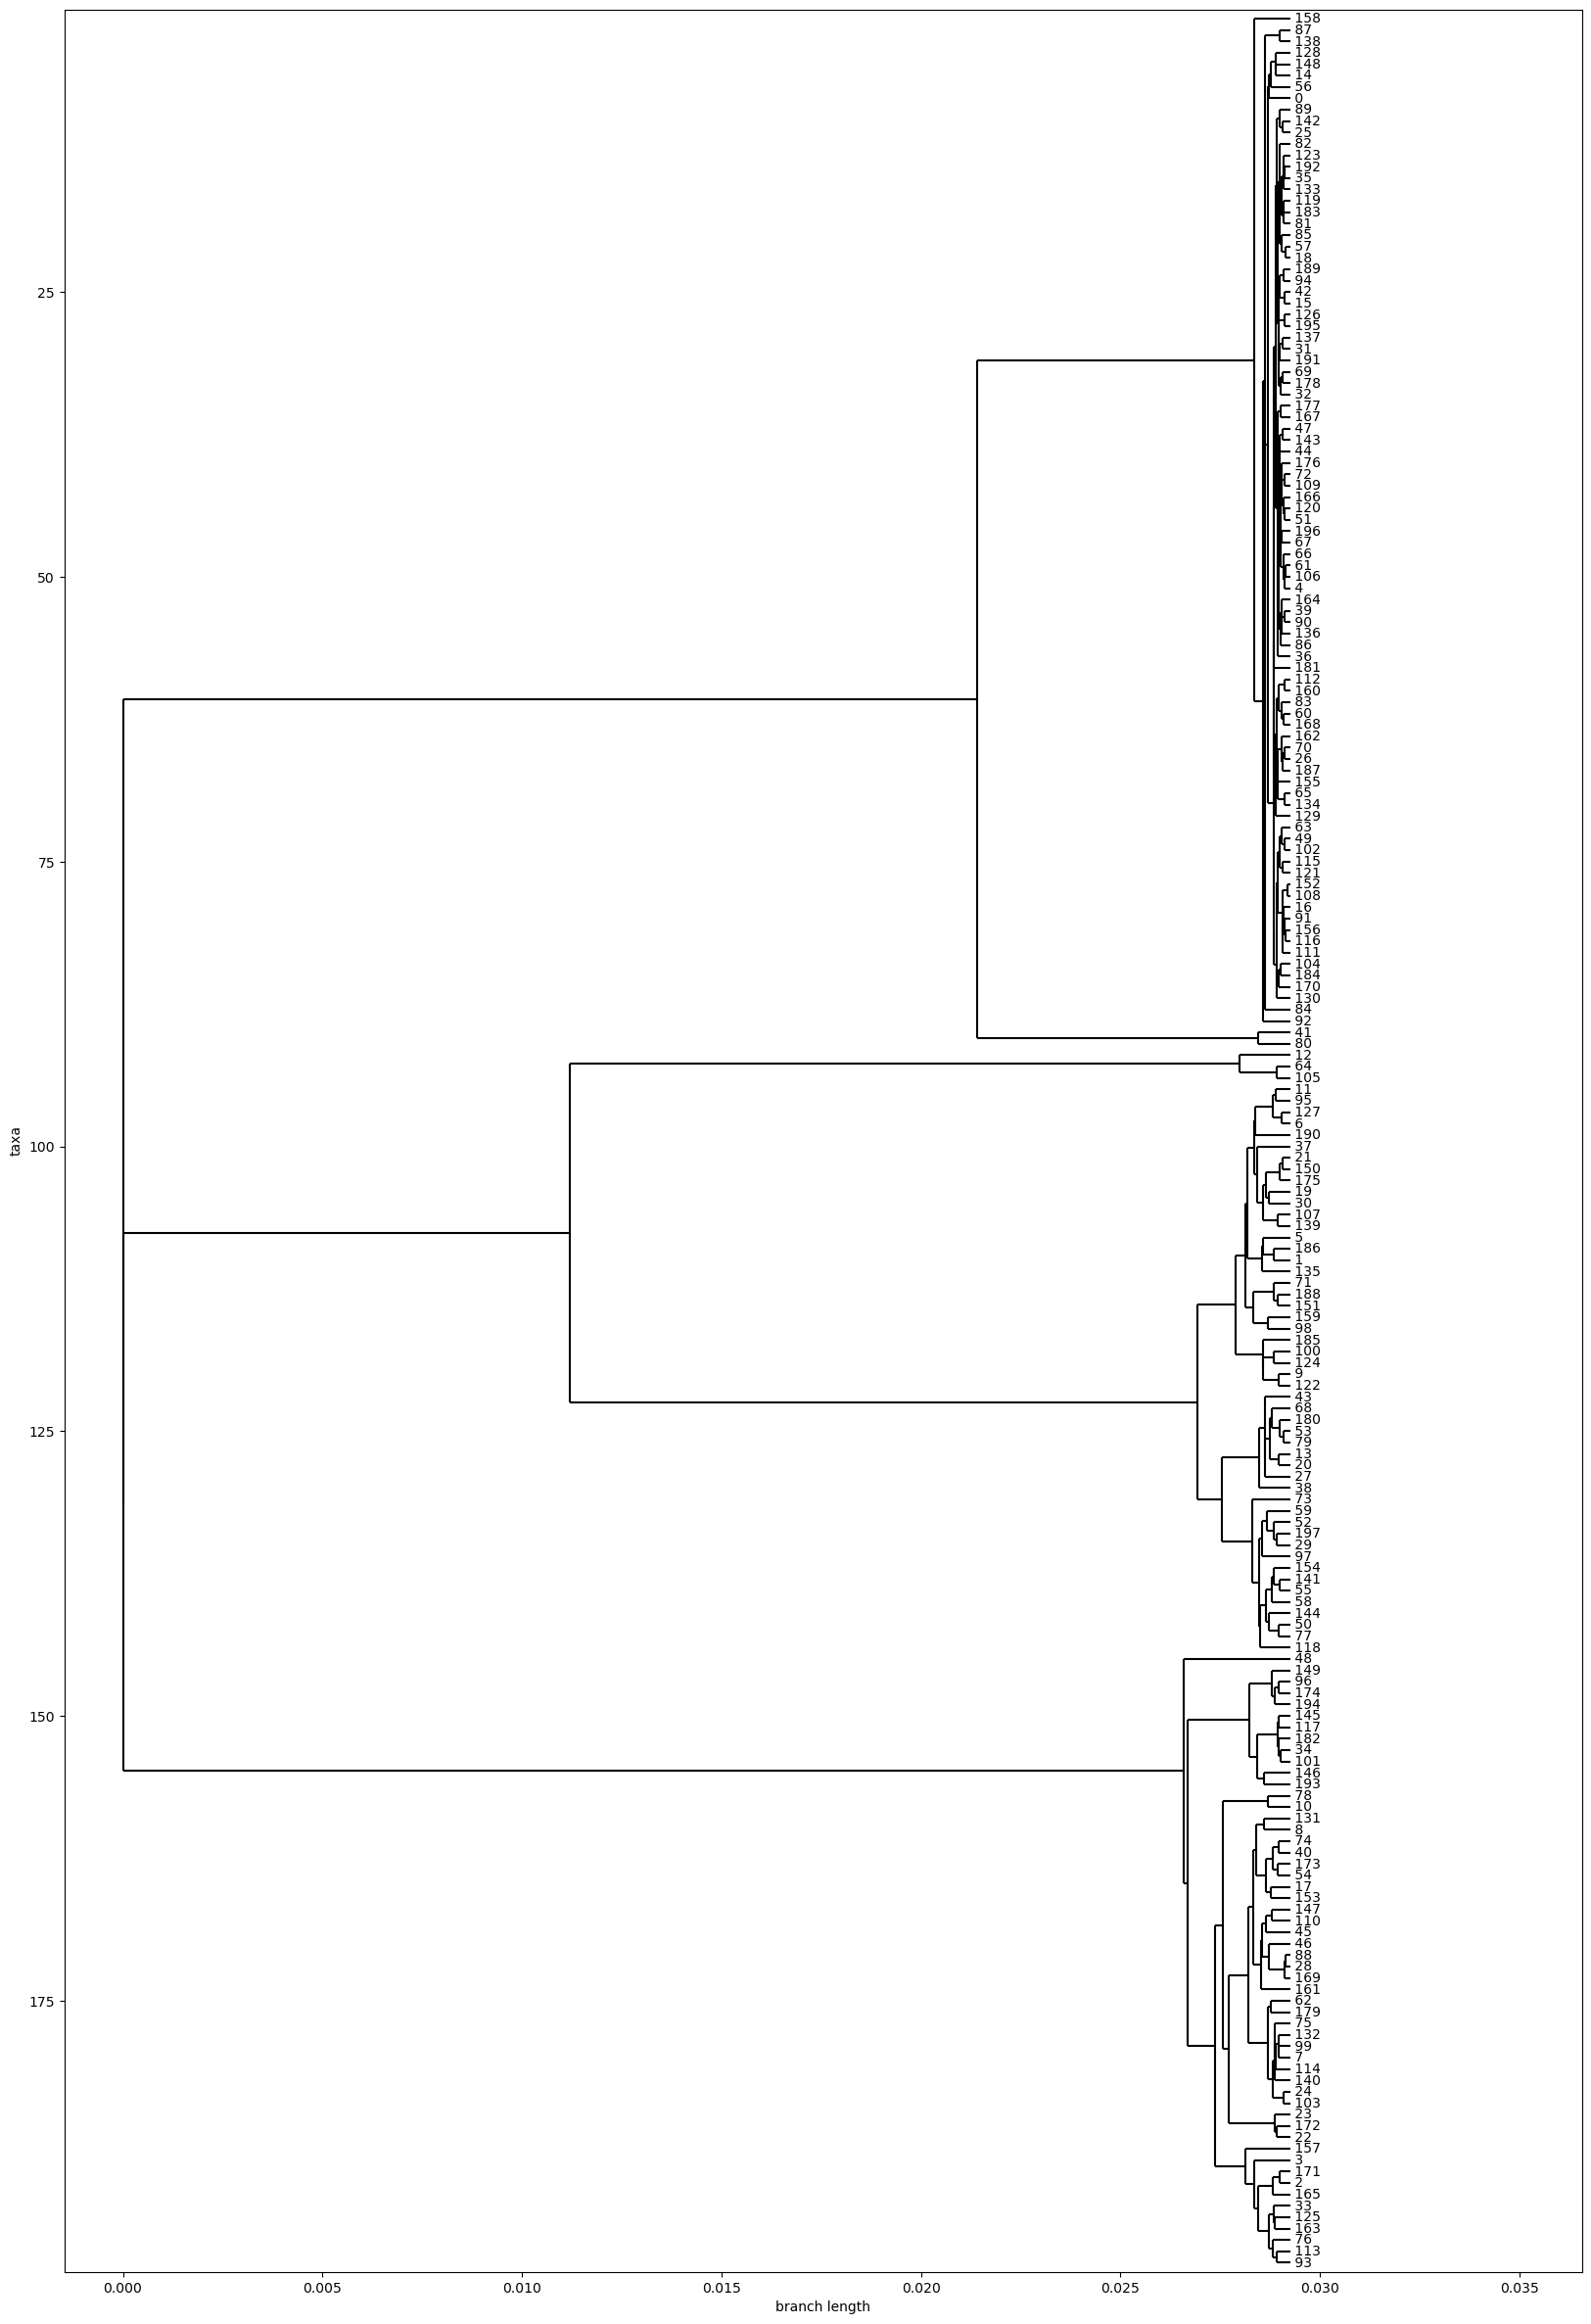

In [11]:
fig, ax = plt.subplots(figsize=(20, 30))

Phylo.draw(tr, axes=ax)

In [13]:
import dendropy

In [14]:
no_taxa = 198

In [15]:
dpy_tr = dendropy.Tree.get(data=nwk_str, schema="newick", rooting="default-rooted")

In [16]:
dpy_tr.calc_node_ages(ultrametricity_precision=1e-01) # assuming branch length in generations
u_vec = np.zeros(no_taxa) # vector of (internal) node ages, last element always 0

nd_lab = 0
for int_nd in dpy_tr.ageorder_node_iter(include_leaves=False, filter_fn=None, descending=True):
    int_nd.label = nd_lab # integer label
    u_vec[nd_lab] = int_nd.age
    nd_lab += 1

F_mtx = np.zeros((no_taxa-1, no_taxa-1), dtype=int)
W_mtx = np.zeros((no_taxa-1, no_taxa-1))

In [17]:
# populate W matrix
for i in range(no_taxa-1):
    for j in range(i+1):
        W_mtx[i, j] = u_vec[j] - u_vec[i+1]

In [18]:
dpy_tr.seed_node.label

1

In [22]:
dpy_tr.reroot_at_node(dpy_tr.nodes(lambda n: n.label == 0)[0])

<Node object at 0x155118ef3190: '0' (None)>

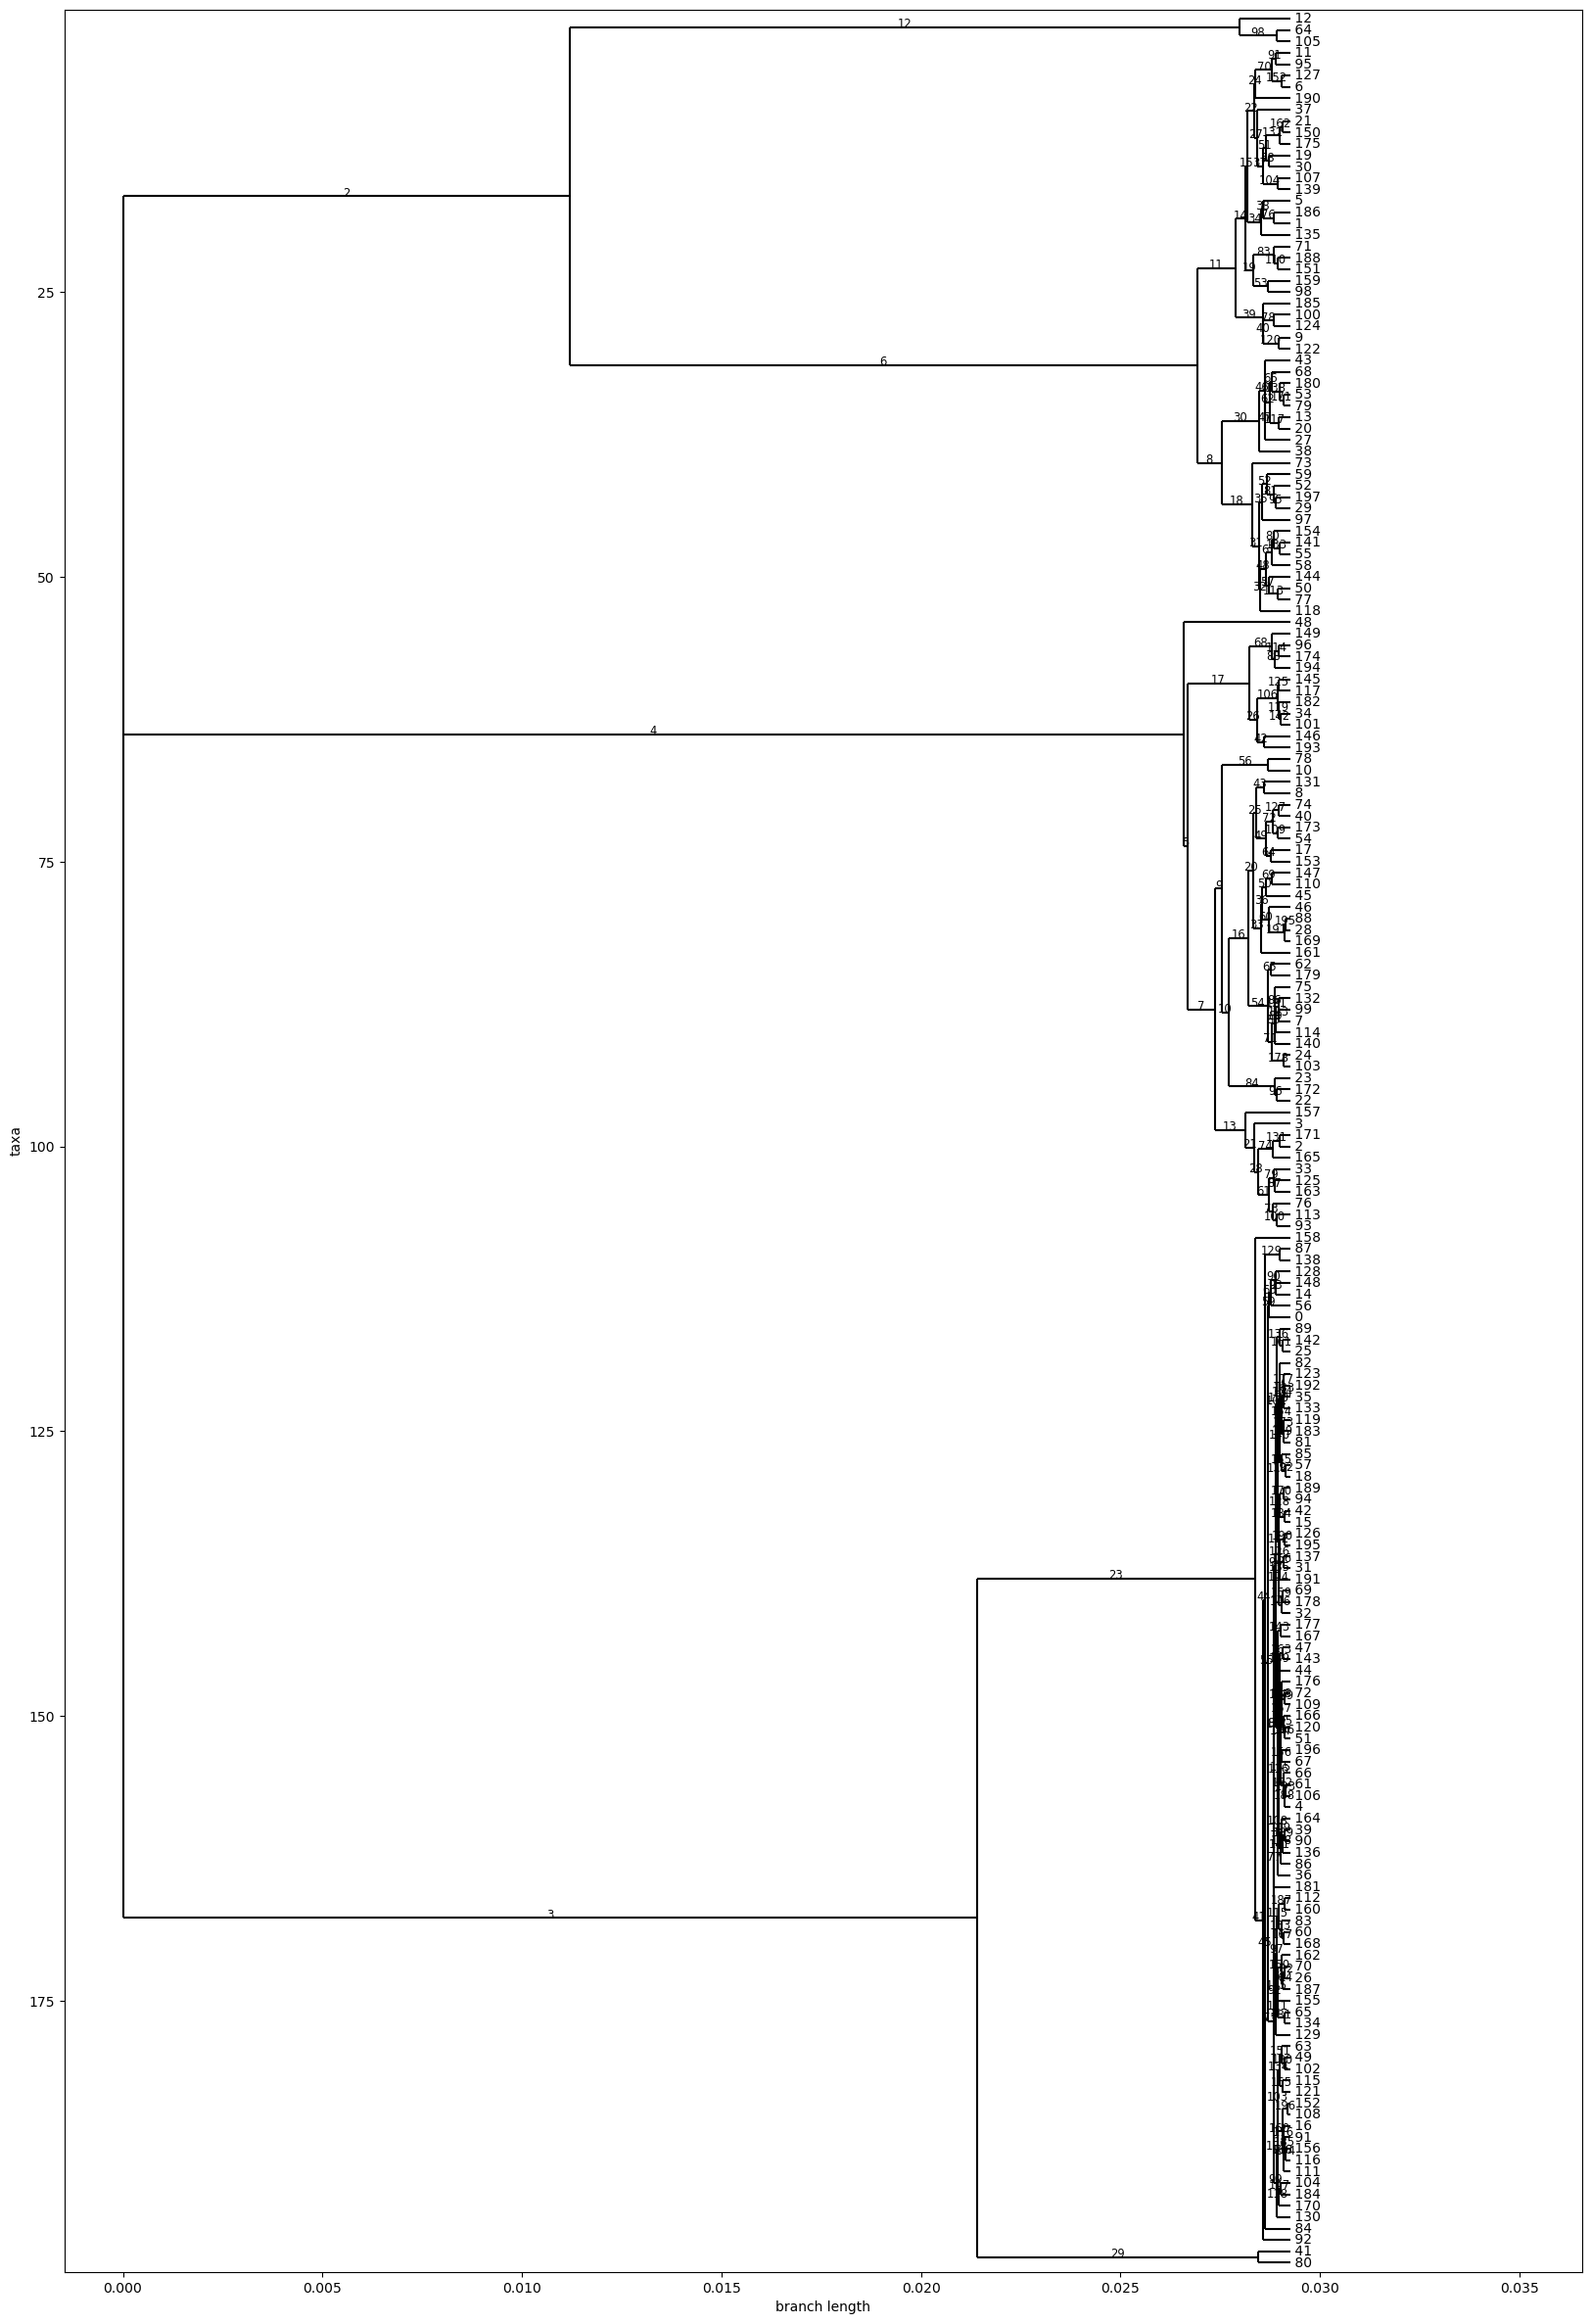

In [23]:
tr = Phylo.read(StringIO(dpy_tr.as_string("newick")), "newick")

fig, ax = plt.subplots(figsize=(20, 30))

Phylo.draw(tr, axes=ax)

In [25]:
for nd in dpy_tr.ageorder_node_iter(include_leaves=False, filter_fn=None, descending=True):
#for nd in dpy_tr.preorder_node_iter():
    print(nd, nd.label, nd.parent_node, nd.age)

<Node object at 0x155118ef3190: '0' (None)> 0 None 0.029255000000000003
<Node object at 0x155118ef31f0: '2' (None)> 2 <Node object at 0x155118ef3190: '0' (None)> 0.018061
<Node object at 0x155118f2dc70: '3' (None)> 3 <Node object at 0x155118ef3190: '0' (None)> 0.007840999999999999
<Node object at 0x1551220a6eb0: '4' (None)> 4 <Node object at 0x155118ef3190: '0' (None)> 0.002669
<Node object at 0x1551220a6fd0: '5' (None)> 5 <Node object at 0x1551220a6eb0: '4' (None)> 0.002574
<Node object at 0x155118ef3550: '6' (None)> 6 <Node object at 0x155118ef31f0: '2' (None)> 0.0023230000000000004
<Node object at 0x1551220adc70: '7' (None)> 7 <Node object at 0x1551220a6fd0: '5' (None)> 0.001883
<Node object at 0x1551220a14c0: '8' (None)> 8 <Node object at 0x155118ef3550: '6' (None)> 0.001722
<Node object at 0x1551220adcd0: '9' (None)> 9 <Node object at 0x1551220adc70: '7' (None)> 0.001699
<Node object at 0x1551220adf10: '10' (None)> 10 <Node object at 0x1551220adcd0: '9' (None)> 0.001547
<Node obje

In [50]:
try:
    for head_node in dpy_tr.preorder_node_iter():
        if head_node.label == 0: # root node
            #print("I am root")
            continue
        if head_node.is_leaf():
            edg_head = no_taxa - 1
        else:
            edg_head = head_node.label
            
        edg_tail = head_node.parent_node.label
        
        #print(edg_head, edg_tail)
        for j in range(edg_tail, edg_head):
            for i in range(j, edg_head):
                F_mtx[i, j] += 1
except:
    print("Error at head node:", head_node.label, head_node.parent_node)

In [16]:
F, W, R = encode(nwk_str, 198, list(map(str, np.nonzero(vOI_gt)[0])))

AttributeError: 'NoneType' object has no attribute 'label'

In [52]:
F_mtx

array([[  3,   0,   0, ...,   0,   0,   0],
       [  3,   3,   0, ...,   0,   0,   0],
       [  2,   2,   4, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 196,   0,   0],
       [  0,   0,   0, ..., 195, 197,   0],
       [  0,   0,   0, ..., 194, 196, 198]])

In [36]:
R

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 4, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 5, 7, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 4, 6, 8]])

In [40]:
(W*4*10000).astype(int)

array([[ 6806,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [ 7675,   868,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [17822, 11016, 10147,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [17996, 11190, 10321,   173,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [19412, 12605, 11737,  1589,  1415,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [20586, 13779, 12911,  2763,  2589,  1173,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [20966, 14160, 13291,  3144,  2970,  1554,   380,     0,     0,
            0,     0,     0,     0,     0,     0],
       [21481, 14675, 13806,  3659,  3485,  2069,   895,   515,     0,
            0,     0,     0,     0,     0,     0],
       [21514, 14707, 13

#### Check trial run

In [17]:
with np.load("/grid/siepel/home_norepl/mo/dom_adapt/1000GCEU_reanalysis/discoal_out/discoal_TRIAL2neu_1128_198_neu_60.npz") as npzF:
    print(list(npzF.keys()))
    SC = npzF["SC"]
    SAF = npzF["SAF"]
    CAF = npzF["CAF"]
    onset = npzF["onset"]
    foc_var_pos = npzF["foc_var_pos"]
    site_cnt = npzF["site_cnt"]
    fea = npzF["fea"]

['SC', 'SAF', 'CAF', 'onset', 'foc_var_pos', 'site_cnt', 'fea']


In [19]:
fea[23]

array([[[    2,     0,     0, ...,     0,     0,     0],
        [    1,     3,     0, ...,     0,     0,     0],
        [    1,     2,     4, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,   196,     0,     0],
        [    0,     0,     0, ...,   195,   197,     0],
        [    0,     0,     0, ...,   194,   196,   198]],

       [[ 5041,     0,     0, ...,     0,     0,     0],
        [15123, 10081,     0, ...,     0,     0,     0],
        [18083, 13042,  2960, ...,     0,     0,     0],
        ...,
        [20758, 15716,  5635, ...,    30,     0,     0],
        [20765, 15724,  5642, ...,    37,     7,     0],
        [20818, 15776,  5695, ...,    90,    60,    52]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,    27,     0,     0],
        [    0,     0,     0, ...,    27,    